# Fake data notebook

In this notebook we are going to make up some data so we can do hypothesis testing in python. This notebook will utilize numpy, scipy and pandas to build and fake data. I am doing it as a tutorial notebook so that if you want to you can change the the data to fit anything that you might find easier to understand. It may also help with to understand python a bit better. If you don't care about how the data was created then have fun with the other notebooks!

## Why not use other datasets?

After searching around the internet I couldn't find anything I particularly liked. I particularly wanted a faked dataset that was useful to people doing pyschology/neuroscience and there wasn't much out there.

## The scenario

In this experiment we are examining the performace on two tasks in a sample of individuals who have a diagnosis of depression, a diagnosis of anxiety and controls. Each group will have 50 people in it to have a sample size of 150. 

For the sake of conceptulising lets imagine that this is two visual search tasks, and the data we have (will fake) is time taken in millseconds to complete the task. As a side note this is all faked some of the results may not make sense in the wider literature context (i.e why would anxious people take longer on the task).

## Aim of the notebook

For task one we will create three normal distributions, one for each group. The means will differ for controls v the other two groups but much between the patient groups. The standard deviations will be indentical. This way this task can be analysed using parameteric approaches. 

For task two we will create two normal distributions and one skewed distribution. The standard deviations will differ between groups. This task will have to be analysed no-parametrically. 

## Code time

First we need to load in the libraries we need. For this notebook we will need numpy to randomly generate the data, scipy to create more complex distrubtions and to test the data, seaborn and matplotlib to plot the distibutions and finally pandas to make a nice shinny dataframe to save as a csv.



In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

## Task one

Lets create three normal distributions using numpy. The mean will center around 0.5 for the controls, while 1.3 for the anxiety group and 1.8 for the depressed group

In [47]:
controls_task_1 = np.abs(np.random.default_rng().normal(0.5, 0.5, 50))
depressed_group_task_1 = np.abs(np.random.default_rng().normal(1.5, 0.5, 50))
anxious_task_1 = np.abs(np.random.default_rng().normal(1.4, 0.5, 50))

Now lets put everything into one dataframe

In [48]:
task_1 = {
    'controls_task_1': controls_task_1,
    'depressed_group_task_1': depressed_group_task_1,
    'anxious_group_task_1' : anxious_task_1    
    }

task_1_df = pd.DataFrame(data=task_1, index=range(0,50) )

and plot the distributions using scipy to check they look ok.

<Axes: ylabel='Density'>

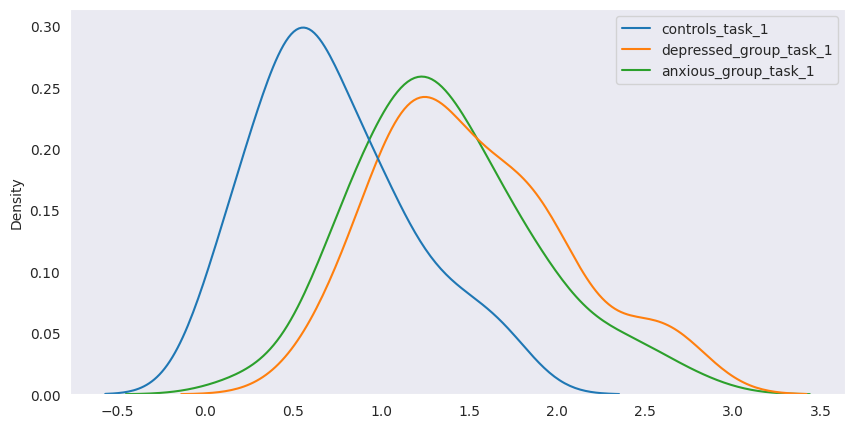

In [49]:
plt.figure(figsize=(10,5))
sns.kdeplot(task_1_df)

The distibutions look roughly normal. But to confirm we can use scipy's normal test and levene's test to check that all the distributions have equal variance

In [50]:
print("Levene's test for the three groups", 
      scipy.stats.levene(task_1_df['controls_task_1'], 
                         task_1_df['depressed_group_task_1'], 
                         task_1_df['anxious_group_task_1']))

Levene's test for the three groups LeveneResult(statistic=0.8348692687369906, pvalue=0.435978072713993)


In [51]:
for column in task_1_df.columns:
    print(f'{column} test to confirm the distribution is normal:', scipy.stats.normaltest(task_1_df[column]))


controls_task_1 test to confirm the distribution is normal: NormaltestResult(statistic=3.275813775123082, pvalue=0.19438648955174126)
depressed_group_task_1 test to confirm the distribution is normal: NormaltestResult(statistic=2.992085237694937, pvalue=0.22401492075155408)
anxious_group_task_1 test to confirm the distribution is normal: NormaltestResult(statistic=3.0256363893791303, pvalue=0.2202882870670739)


## Task two.

For this task we want the controls to have an unequal variation and the anxious group to have a skewed distribution. To do this again lets create three normal distributions but this time give the controls a different standard error and the anxious group a skewed distribution.

In [120]:
controls_task_2 = np.abs(np.random.default_rng().normal(1.5, 1, 50))
depressed_group_task_2 = np.abs(np.random.default_rng().normal(2, 0.5, 50))
anxious_task_2 = np.abs(np.random.default_rng().triangular(1.8, 2,4.55,  50))

Merge into a dataframe then plot the distributions

<Axes: ylabel='Density'>

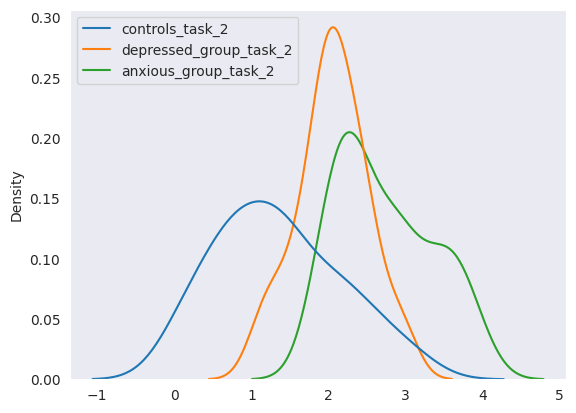

In [121]:
task_2 = {
    'controls_task_2': controls_task_2,
    'depressed_group_task_2': depressed_group_task_2,
    'anxious_group_task_2' : anxious_task_2    
    }


task_2_df = pd.DataFrame(data=task_2, index=range(0,50))
sns.kdeplot(task_2_df)

The distributions look different from each other. Lets do levene's test and normal test to check the distributions differ from each other.

In [122]:
print("Levene's test for the three groups", 
      scipy.stats.levene(task_2_df['controls_task_2'], 
                         task_2_df['depressed_group_task_2'], 
                         task_2_df['anxious_group_task_2']))

Levene's test for the three groups LeveneResult(statistic=8.269293878433778, pvalue=0.00039512657369960967)


In [123]:
for column in task_2_df.columns:
    print(f'{column} test to confirm the distribution is normal:', scipy.stats.normaltest(task_2_df[column]))

controls_task_2 test to confirm the distribution is normal: NormaltestResult(statistic=2.3059526797235548, pvalue=0.3156957518293425)
depressed_group_task_2 test to confirm the distribution is normal: NormaltestResult(statistic=0.12646260611032487, pvalue=0.9387263183103636)
anxious_group_task_2 test to confirm the distribution is normal: NormaltestResult(statistic=9.292686834104913, pvalue=0.009596628721269347)


Great. The anxious group distribution is not a normal distribution and all the distriubtion differs from each.

## The Final Dataframe

Lets now create multiple group columns which we will merge into one column later.


In [138]:
task_1_df['HC'] = 'HC'
task_1_df['DEP'] = 'DEP'
task_1_df['ANX'] = 'ANX'

Now lets merge the task data into two columns and the group columns into one.

In [139]:
final_data = {
    'task_one': np.hstack((controls_task_1, depressed_group_task_1, anxious_task_1)),
    'task_two': np.hstack((controls_task_2, depressed_group_task_2, anxious_task_2)),
    'Group': pd.concat([task_1_df['HC'], task_1_df['DEP'],task_1_df['ANX']], axis=0).rename('Group').reset_index(drop=True)
}

final_df = pd.DataFrame(data=final_data, index=range(0,150))

Finally lets save the dataframe to a csv file

In [140]:
final_df.to_csv('data/task_data.csv')

## Another Dataframe???

Yeah so later on I decided to make another one. This time it is results from a questionnaire given to 500 people. The questionnaire also asks the persons age, how long they where in education and gender (dummy variable) 

In [50]:
info = {
    'age':np.random.default_rng().integers(18, 30, 500),
    'years_in_education': np.random.default_rng().integers(11, 20 , 500),
    'gender': np.random.default_rng().integers(0, 2 , 500),
        }

info['questionnaire'] = info['age'] * info['years_in_education'] /100

questionnaire_data = pd.DataFrame(info)
questionnaire_data.to_csv('data/questionnaire_data.csv')